In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import logging
import sys

In [3]:
import os , sys
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl
from scripts.Feature_Engineering import create_aggregate_features,extract_time_features,encode_categorical_variables,check_and_handle_missing_values,standardize_numerical_features,construct_rfms_scores,save_transformed_data

In [4]:
#import data
data = dl.load_data("data.csv")
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Step 1: Create Aggregate Features

Create Aggregate Features Aggregate transaction data by CustomerId to compute total, average, count, and standard deviation of amounts.

In [5]:
data = create_aggregate_features(data)
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


aggregates the transaction amounts for each customer. Specifically, it groups the data by CustomerId and calculates the sum of the Amount for each customer Insight: Aggregated features like Total_Transaction_Amount and Transaction_Count provide customer-level summaries.

Step 2: Extract Time Features

Extract Time Features Extract hour, day, month, and year from TransactionStartTime.

In [6]:
data = extract_time_features(data)
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Total_Transaction_Amount,Average_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


Extracted Transaction Features
The above new columns were added to the DataFrame based on the transaction timestamp (TransactionStartTime):

TransactionHour: The hour of the day when the transaction occurred.

TransactionDay: The day of the month when the transaction occurred.

TransactionMonth: The month when the transaction occurred.

TransactionYear: The year when the transaction occurred

Insight: Added time-based features (Transaction_Hour, Transaction_Day, etc.) for temporal analysis.

Step 3: Construct RFMS Scores to Generate Label
Construct RFMS Scores and Labels Compute RFMS scores (Recency, Frequency, Monetary, Std) and assign labels (Good=1, Bad=0) based on the median RFMS score.

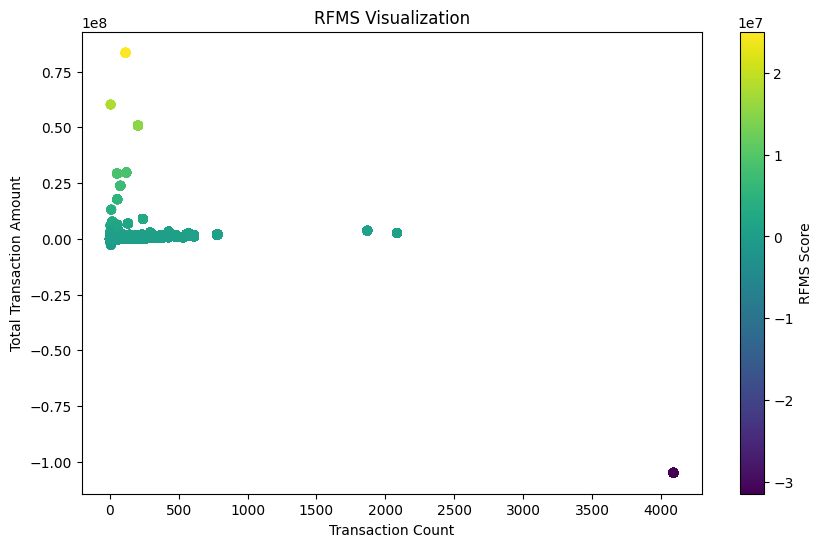

RFMS_score_binned distribution:
 RFMS_score_binned
11    90672
0      4091
12      252
16      205
14      175
13      132
19      115
10       13
17        7
Name: count, dtype: int64
Label distribution by RFMS_score_binned:
 RFMS_score_binned  Label
0                  0         4091
10                 0           13
11                 1        46941
                   0        43731
12                 1          252
13                 1          132
14                 1          175
16                 1          205
17                 1            7
19                 1          115
Name: count, dtype: int64
WOE Results for RFMS_score_binned:
    RFMS_score_binned  count  event  non_event       woe
0                  0   4091      0       4091  0.000000
1                 10     13      0         13  0.000000
2                 11  90672  46941      43731 -0.071002
3                 12    252    252          0  0.000000
4                 13    132    132          0  0.000000
5         

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Recency,RFMS_score,Label,RFMS_score_binned,RFMS_score_binned_WOE
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,3042.294251,2,15,11,2018,2420,33012.225165,0,11,-0.071002
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,3042.294251,2,15,11,2018,2420,33012.225165,0,11,-0.071002
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0.000000,2,15,11,2018,2420,300.600165,0,11,-0.071002
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,17169.241610,3,15,11,2018,2420,68629.560165,1,11,-0.071002
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,17169.241610,3,15,11,2018,2420,68629.560165,1,11,-0.071002


In [7]:
data = construct_rfms_scores(data)
data.head()

Step 4: Encode Categorical Variables using RFMS Label as Target

Encode Categorical Variables Encode categorical columns (ProviderId, ProductId, ProductCategory) using WoE and one-hot encode ChannelId.

In [8]:
data = encode_categorical_variables(data, target_variable='Label')
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


Step 6: Standardize Numerical Features

Standardize Numerical Features Standardize numerical columns to have a mean of 0 and a standard deviation of 1.

In [9]:
data = standardize_numerical_features(data)
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


In [10]:
data.columns.tolist()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult',
 'Total_Transaction_Amount',
 'Average_Transaction_Amount',
 'Transaction_Count',
 'Std_Transaction_Amount',
 'Transaction_Hour',
 'Transaction_Day',
 'Transaction_Month',
 'Transaction_Year',
 'Recency',
 'RFMS_score',
 'Label',
 'RFMS_score_binned',
 'RFMS_score_binned_WOE',
 'ProviderId_WOE',
 'ProviderId_WOE',
 'ProductId_WOE',
 'ProductId_WOE',
 'ProductCategory_WOE',
 'ProductCategory_WOE',
 'ChannelId_ChannelId_2',
 'ChannelId_ChannelId_3',
 'ChannelId_ChannelId_5']

In [11]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_score_binned_WOE,ProviderId_WOE,ProviderId_WOE,ProductId_WOE,ProductId_WOE,ProductCategory_WOE,ProductCategory_WOE,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,0,...,-0.071002,-0.413610,-0.413610,0.304295,0.304295,0.109343,0.109343,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,0,...,-0.071002,-0.413610,-0.413610,0.214869,0.214869,0.109343,0.109343,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,8,...,-0.071002,0.481371,0.481371,-0.361181,-0.361181,-0.427382,-0.427382,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,2,...,-0.071002,0.118382,0.118382,-0.154972,-0.154972,-0.057930,-0.057930,True,False,False


Aggregate Features: Customer-level summaries enhance predictive power.
Time Features: Temporal patterns may influence fraud detection.
RFMS Scores: Balanced Label distribution improves model training.
Encoding: WOE encoding with high IV for ProviderId suggests strong predictive value.